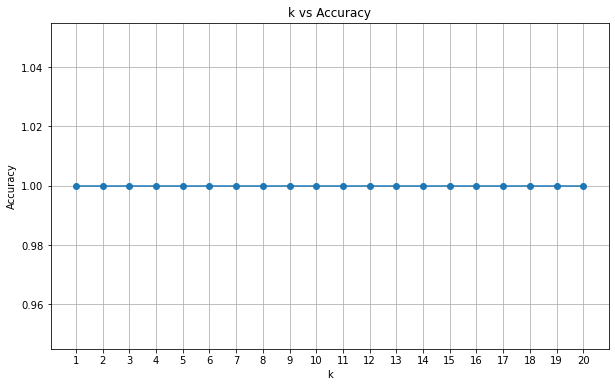

Maximum accuracy of 1.00 is achieved at k = 1
Accuracy with optimal k: 1.0
Confusion Matrix with optimal k:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [3]:
# Implement K-NN Classifier for classification of any dataset of your choice.
# a. Load an existing data set
# b. Split the data set to train and test sets
# c. Test your model using test set. Find accuracy and confusion Matrix.
# d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs
# accuracy” and find out the value of k for maximum accuracy for the test samples.
# NOTE: Don’t use any library. Develop a generalised function to implement K-NN Classifier.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def knn_classifier(X_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return y_pred

# Function to calculate accuracy and confusion matrix
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    return accuracy, confusion_mat

k_values = range(1, 21)  
accuracies = []

for k in k_values:
    y_pred = knn_classifier(X_train, y_train, X_test, k)
    accuracy, _ = evaluate_model(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('k vs Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, 1))
plt.grid(True)
plt.show()

max_accuracy = max(accuracies)
optimal_k = k_values[accuracies.index(max_accuracy)]
print(f"Maximum accuracy of {max_accuracy:.2f} is achieved at k = {optimal_k}")

y_pred_optimal = knn_classifier(X_train, y_train, X_test, optimal_k)
accuracy_optimal, confusion_matrix_optimal = evaluate_model(y_test, y_pred_optimal)   
print("Accuracy with optimal k:", accuracy_optimal)
print("Confusion Matrix with optimal k:\n", confusion_matrix_optimal)
